# 01. Explore Data
This notebook visualizes the COCO dataset and the effects of our Albumentations pipeline.

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

sys.path.append('../src')
from dataset import COCOSegmentationDataset, get_training_augmentations
from utils import visualize

### Configuration
Ensure your COCO dataset is located at `../data/coco2017`.

In [2]:
ROOT_DIR = '../data/coco2017/train2017'
ANN_FILE = '../data/coco2017/annotations/instances_train2017.json'

# Check if paths exist
if not os.path.exists(ROOT_DIR) or not os.path.exists(ANN_FILE):
    print(f"WARNING: Dataset not found at {ROOT_DIR}. Please check paths.")

In [3]:
# Load Dataset with Augmentations
dataset = COCOSegmentationDataset(ROOT_DIR, ANN_FILE, transforms=get_training_augmentations())
print(f"Dataset size: {len(dataset)}")

/home/abood/Documents/sync/Education/ENSA/ENSA_M3/Computer Vision/Project_coco/.venv/lib/python3.12/site-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


loading annotations into memory...
Done (t=13.94s)
creating index...
index created!
Dataset size: 117266


Image Shape: torch.Size([3, 512, 512])
Mask Shape: torch.Size([1, 512, 512])
Mask Unique Values: tensor([0., 1.])


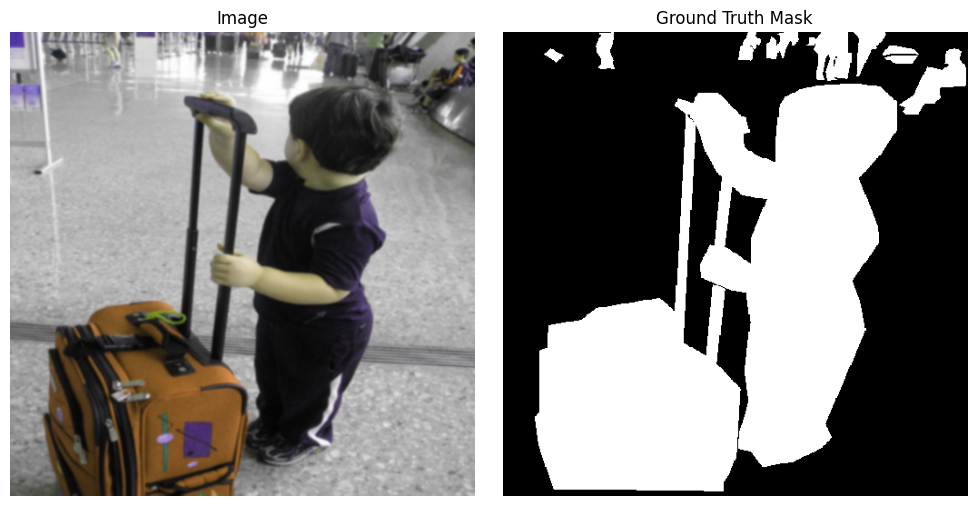

In [4]:
# Visualize Random Samples
import random

idx = random.randint(0, len(dataset)-1)
image, mask = dataset[idx]

print(f"Image Shape: {image.shape}")
print(f"Mask Shape: {mask.shape}")
print(f"Mask Unique Values: {torch.unique(mask)}")

visualize(image=image, mask=mask)